In [1]:
import os

if not os.environ.get('WEBBPSF_PATH'):
    os.environ['WEBBPSF_PATH'] = '/data/webbpsf-data'

import webbpsf

from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

from visualization_helpers import *

import numpy as np

import matplotlib.pyplot as plt

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-059 CANNOT BE CHECKED AGAINST ONLINE VERSION


In [2]:
PROPOSAL_ID = '1386'
INSTRUMENT = 'NIRCAM'
directory = f'/data/scratch/bariskurtkaya/dataset/{INSTRUMENT}/{PROPOSAL_ID}/mastDownload/JWST/'

In [3]:
psfstacks_nircam_dirs = get_stage3_products(suffix='psfstack',directory=directory)

In [4]:
psfstacks_nircam_dirs

['/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f410m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/138

In [5]:
def get_filename_from_dir(fits_dir):
    return '_'.join(fits_dir.split('/')[-1].split('_')[:-1])

In [6]:
get_filename_from_dir(psfstacks_nircam_dirs[0])

'jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r'

In [7]:
psfstacks = {}

for idx, dir in enumerate(psfstacks_nircam_dirs):
    fits_name = get_filename_from_dir(dir)
    psfstacks[fits_name] = fits.open(dir)


In [8]:
psfstacks.keys()

dict_keys(['jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r', 'jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r', 'jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r', 'jw01386-a3001_t002_nircam_f300m-maskrnd-sub320a335r', 'jw01386-a3001_t002_nircam_f356w-maskrnd-sub320a335r', 'jw01386-a3001_t004_nircam_f410m-maskrnd-sub320a335r', 'jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r', 'jw01386-a3001_t002_nircam_f250m-maskrnd-sub320a335r', 'jw01386-a3001_t004_nircam_f360m-maskrnd-sub320a335r'])

In [9]:
psfstacks

{'jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9641f425f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d37d00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d37fa0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d37d90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f94d1d37be0>],
 'jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f94d1db9930>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d54400>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d54550>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d549a0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f94d1d54c70>],
 'jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r': [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f94d1df1d50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d54d30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f94d1d5512

In [10]:
filter_key = 'jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r'

psfstacks[filter_key].info()

Filename: /data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_psfstack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   ()      
  1  SCI           1 ImageHDU        97   (320, 320, 18)   float32   
  2  ERR           1 ImageHDU        11   (320, 320, 18)   float32   
  3  DQ            1 ImageHDU        12   (320, 320, 18)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [9203B]   


In [11]:
def get_ra_dec_with_uncertainty_from_header(fits):
    return fits[0].header['TARG_RA'], fits[0].header['TARG_DEC'], fits[0].header['TARGURA'], fits[0].header['TARGUDEC']

In [12]:
ra, dec, u_ra, u_dec = get_ra_dec_with_uncertainty_from_header(psfstacks[filter_key])

In [13]:
def prepare_query_keys(ra, dec, u_ra, u_dec):
    coord = SkyCoord(ra= ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

    width = u.Quantity(u_ra, u.deg)

    height = u.Quantity(u_dec, u.deg)
    
    return coord, width, height

In [14]:
coord, width, height = prepare_query_keys(ra, dec, u_ra, u_dec)

query_results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [15]:
query_results

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object
1.5232626871036616e-05,1635721458409799680,Gaia DR2 6110381256845438080,6110381256845438080,119194626,2015.5,209.56763593011794,0.3364040420924532,-42.100840357041406,0.30419167593496865,8.511175002379602,0.3569662126601987,23.843082,-25.547947884299656,0.8370395783149855,-17.270894494533756,0.8136840834488758,-0.0014371307,-0.14124125,-0.05278123,0.02811671,-0.065049656,0.0015702923,0.06810869,0.13903396,-0.033562448,-0.12898557,129,129,125,4,110.24479,22721.938,1.482356736863728,735.4910616485903,31,True,0.41890183,2.1427637297306608,0.11885092074371716,-0.017260714,16,9,0.43115076,0,22,False,159,609885055.7359446,4308156.390189642,141.5652,3.7252457,16,462713345.7575974,3564637.6006580708,129.80656,3.6881082,15,204170176.9467501,644299.810553238,316.8869,3.9869392,1.0934577,0,-0.298831,-0.03713751,-0.26169348,--,--,0,--,--,--,NOT_AVAILABLE,315.97606865512864,19.071858385896483,223.03820559068816,-28.00047054327701,100101,8868.667,7963.25,9593.0,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+6110381256845438080
0.007811230606168458,1635721458409799680,Gaia DR2 6110381325563320448,6110381325563320448,371595982,2015.5,209.56386331130446,0.3991640821309076,-42.09356321953618,0.7331471189579251,--,--,--,--,--,--,

In [16]:
def target_star_selection(query_results):
    idx = np.argmin(query_results['dist'])

    return query_results[idx]

In [17]:
target_star = target_star_selection(query_results)

distance = (target_star['parallax'] * u.marcsec).to(u.parsec, equivalencies=u.parallax())

distance, distance.to(u.au)

(<Quantity 117.49259059 pc>, <Quantity 24234586.43365078 AU>)

In [18]:
one_pix_side_length_arcsec = np.sqrt(psfstacks[filter_key][1].header['PIXAR_A2']) * u.arcsec

In [19]:
one_pix_side_length_arcsec, distance.to(u.au) * np.tan(one_pix_side_length_arcsec)

(<Quantity 0.06292853 arcsec>, <Quantity 7.39363612 AU>)

In [20]:
exoplanet_extremes = {
    # https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars
    # 7,506 +5,205 -2,060 AU
    'max_distance_from_star': 7506 * u.au,
    'min_distance_from_star': 0.970 * u.au,
}

In [21]:
max_pixel_distance = exoplanet_extremes['max_distance_from_star'] / (distance.to(u.au) * np.tan(one_pix_side_length_arcsec))
min_pixel_distance = exoplanet_extremes['min_distance_from_star'] / (distance.to(u.au) * np.tan(one_pix_side_length_arcsec))

max_pixel_distance , min_pixel_distance 

(<Quantity 1015.19737811>, <Quantity 0.13119391>)

In [22]:
fov = np.round(np.sqrt(psfstacks[filter_key][1].header['PIXAR_A2']), 3) * psfstacks[filter_key][1].data.shape[1] #* psfstacks[filter_key][1].data.shape[2]

In [23]:
fov

20.16

In [24]:
def create_psf_model(det='NRCA1', filt='F070W', fov_arcsec=5):

    nrc = webbpsf.NIRCam()

    nrc.detector = det 
    nrc.filter = filt

    print("Using a {field}".format(field=fov_arcsec), "arcsec fov")

    psf = nrc.calc_psf(fov_arcsec=fov_arcsec, oversample=2, display=True)
    #psf = nrc.calc_psf(fov_pixels=fov_pixels, oversample=2, display=True)
    webbpsf.display_psf(psf)
    
    # psf = nrc.psf_grid(num_psfs=9, all_detectors=False)
    # webbpsf.gridded_library.display_psf_grid(psf)

    return psf     

In [25]:
detector = psfstacks[filter_key][0].header['DETECTOR']

if detector == 'NRCALONG':
    detector = 'NRCA5'
elif detector == 'NRCBLONG':
    detector = 'NRCB5'

filter = psfstacks[filter_key][0].header['FILTER']

Using a 40.32 arcsec fov


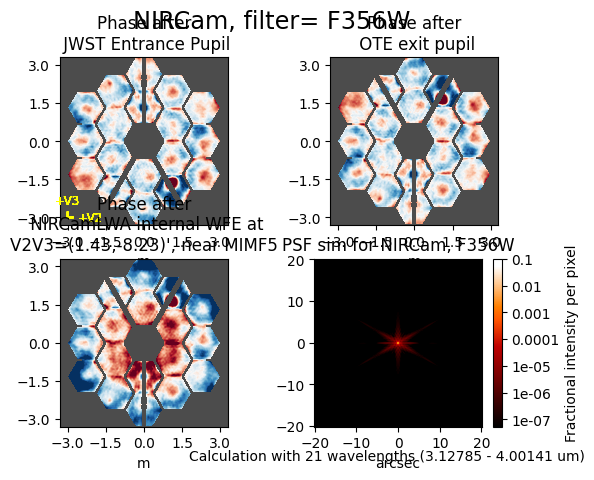

In [26]:
psf = create_psf_model(det=detector, filt=filter, fov_arcsec=fov*2)

In [27]:
psf[0].header, '-------------------------------------------', psf[1].header

(SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                  -64 / array data type                                
 NAXIS   =                    2 / number of array dimensions                     
 NAXIS1  =                 1280                                                  
 NAXIS2  =                 1280                                                  
 EXTEND  =                    T                                                  
 PLANE1  = 'Wavefront Intensity'                                                 
 WAVELEN = 3.53292113599042E-06 / Weighted mean wavelength in meters             
 DIFFLMT =   0.0977010805395139 / Diffraction limit lambda/D in arcsec           
 OVERSAMP=                    2 / Oversampling factor for FFTs in computation    
 DET_SAMP=                    2 / Oversampling factor for MFT to detector plane  
 PIXELSCL=               0.0315 / Scale in arcsec/pix (after oversampling)       
 FOV     =      

In [28]:
def find_differences(psfs):
    for idx, key in enumerate(psfs[0].header.keys()):
        try:
            if psfs[0].header[key] != psfs[1].header[key] or psfs[0].header[key] != psfs[2].header[key] or psfs[0].header[key] != psfs[3].header[key]:
                print(key, psfs[0].header[key], psfs[1].header[key], psfs[2].header[key], psfs[3].header[key])
        except:
            print(key, 'not found in psfs')


In [29]:
find_differences(psf)

SIMPLE not found in psfs
NAXIS1 1280 640 1280 640
NAXIS2 1280 640 1280 640
EXTEND not found in psfs
OVERSAMP 2 1 2 1
PIXELSCL 0.0315 0.063 0.0315 0.063
EXTNAME OVERSAMP DET_SAMP OVERDIST DET_DIST


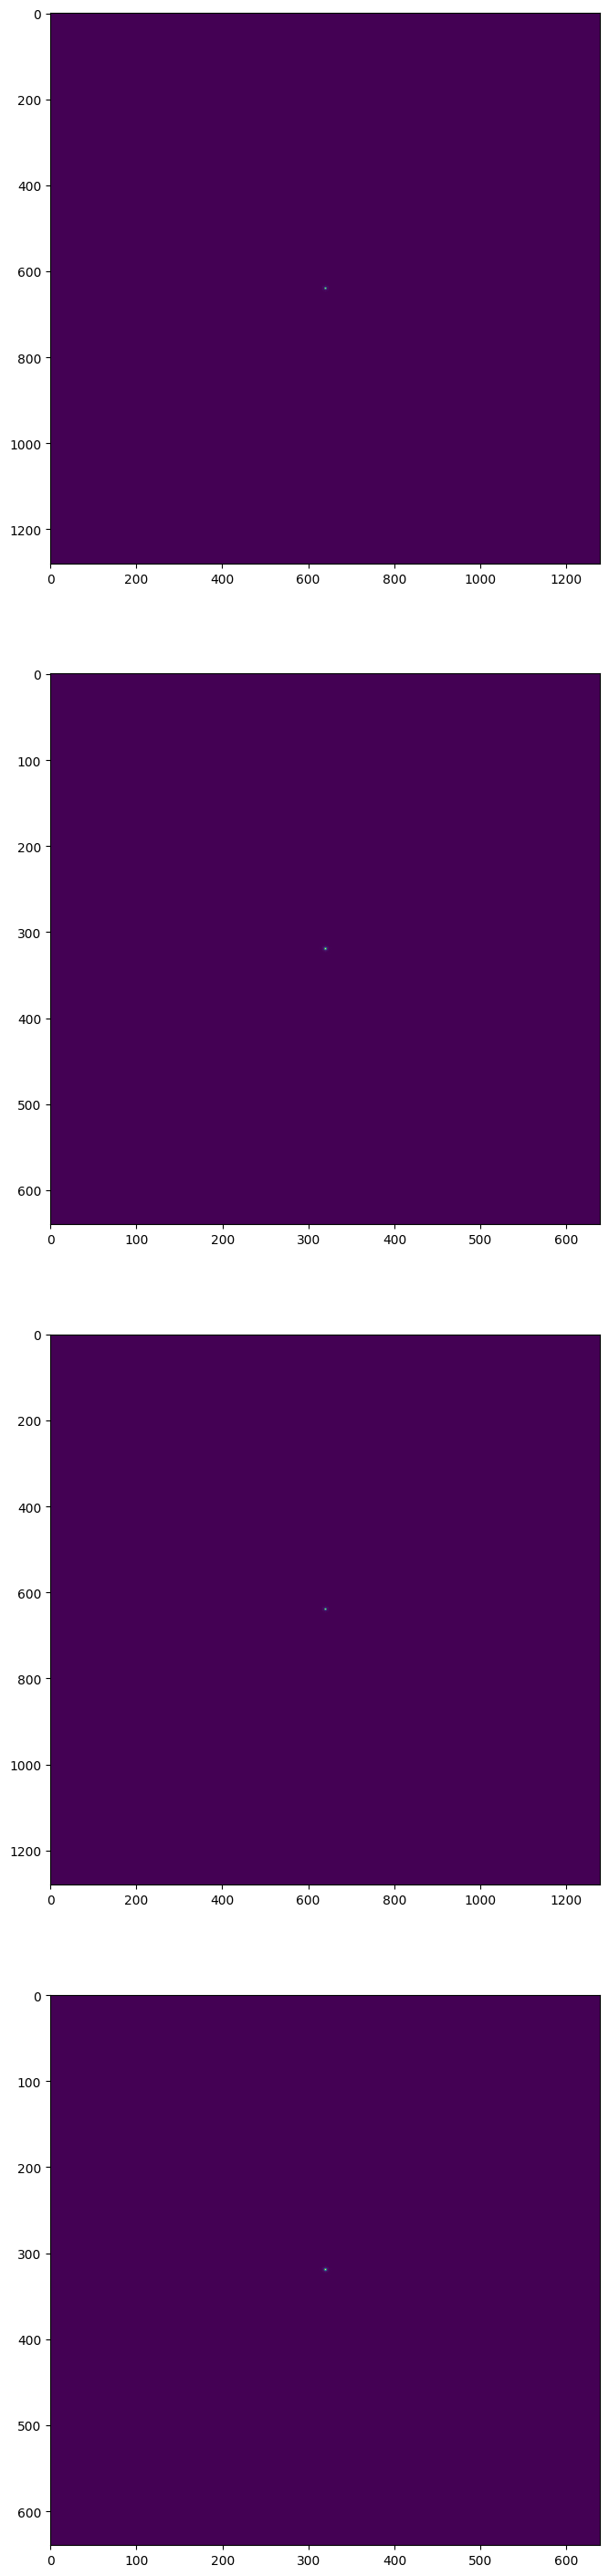

In [30]:
plt.figure(figsize=(36,36))

plt.subplot(4,1,1)
plt.imshow(psf[0].data)

plt.subplot(4,1,2)
plt.imshow(psf[1].data)

plt.subplot(4,1,3)
plt.imshow(psf[2].data)

plt.subplot(4,1,4)
plt.imshow(psf[3].data)


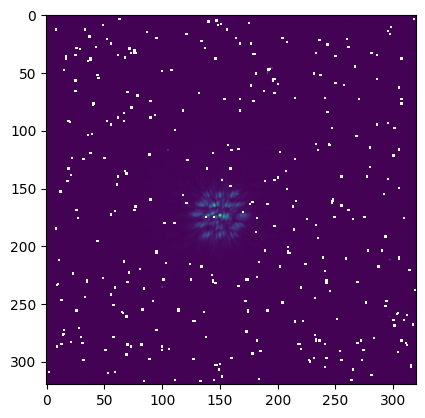

In [31]:
plt.imshow(psfstacks[filter_key][1].data[0])

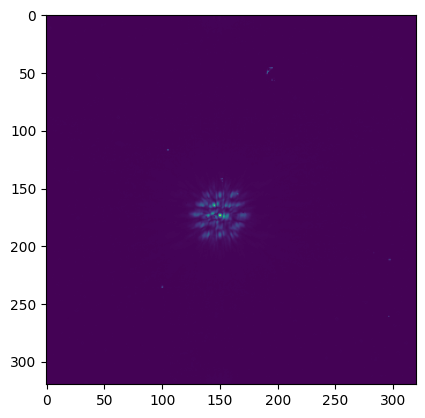

In [32]:
from scipy.interpolate import griddata

#grid = griddata(points, values, (grid_x, grid_y), method='linear')

for idx,_ in enumerate(psfstacks[filter_key][1].data):
    psfstacks[filter_key][1].data[idx] = np.nan_to_num(psfstacks[filter_key][1].data[idx])

plt.imshow(psfstacks[filter_key][1].data[0])

In [59]:
np.round(np.max(psfstacks[filter_key][1].data[0])/10)

temp_psf = psf[1].data * (np.max(psfstacks[filter_key][1].data[0]) / (2.5 * np.max(psf[1].data)))

In [60]:
np.max(temp_psf), np.max(psfstacks[filter_key][1].data[0])

(1045.160400390625, 1045.1604)

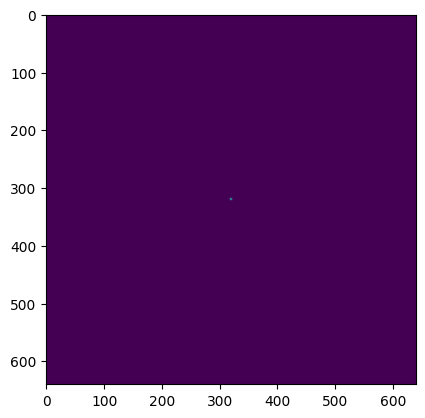

In [61]:
plt.imshow(temp_psf)

In [68]:
def random_injection(psfstack, generated_psf):
    x = np.random.randint(0, psfstack[1].data.shape[1])
    y = np.random.randint(0, psfstack[1].data.shape[2])

    x = 50
    y = 50
    print(x,y)

    injected = generated_psf[320-x:320-x+psfstack[1].data.shape[1], 320-y:320-y+psfstack[1].data.shape[2]] + psfstack[1].data[0]

    return injected

In [69]:
injected = random_injection(psfstacks[filter_key], temp_psf)

50 50


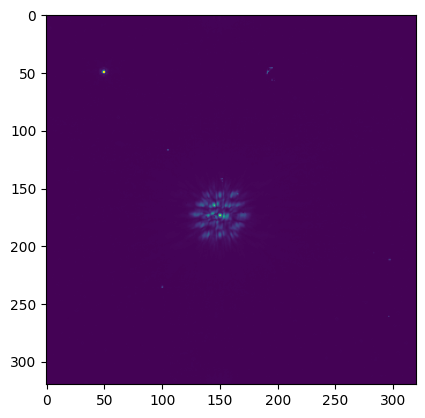

In [70]:
plt.imshow(injected)

# Real data

In [39]:
i2d_dir_1386 = '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_i2d.fits'

fits.open(i2d_dir_1386).info()

Filename: /data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     366   ()      
  1  SCI           1 ImageHDU        75   (318, 324)   float32   
  2  ERR           1 ImageHDU        10   (318, 324)   float32   
  3  CON           1 ImageHDU        10   (318, 324, 1)   int32   
  4  WHT           1 ImageHDU         9   (318, 324)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (318, 324)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (318, 324)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (318, 324)   float32   
  8  HDRTAB        1 BinTableHDU    824   1R x 407C   [23A, 5A, 3A, 47A, 7A, 13A, 15A, 6A, 7A, 9A, 4A, L, D, D, D, D, 9A, 9A, 70A, 14A, 3A, D, 28A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 28A, 20A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 9A, 9A, 5A, D, D, D, D, D

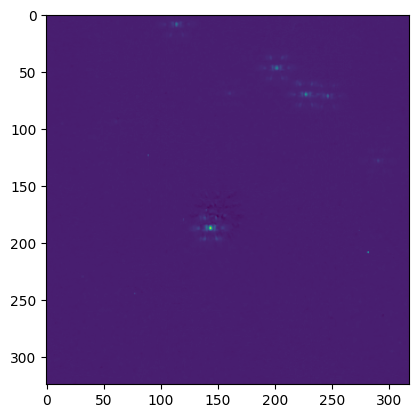

In [40]:
plt.imshow(fits.open(i2d_dir_1386)[1].data)